In [36]:
import pandas as pd
import geopandas as gpd
import numpy as np
from math import exp as e
import matplotlib.pyplot as plt
import time
#import networkx as nx
#import osmnx as ox
#from pandana.loaders import osm
from shapely.geometry import Point, Polygon
import multiprocessing as mp
import io
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points
%matplotlib inline
#ox.config(use_cache=True, log_console=True)
#ox.__version__

In [37]:
bd_celdas_rm = ('acc_metro.shp')
celdas_rm = gpd.read_file(bd_celdas_rm)

In [38]:
celdas_rm['centroid'] = celdas_rm.centroid

In [39]:
display(celdas_rm)

,cell,area,COMUNA,MANZ_SII,NOM_COMUNA,CMN_MZ,AREA_1,layer,path,m2_manz,Estacion,acc_metro,lat,lon,aux,geometry,centroid
0,8,58456.714755,15103,888,PROVIDENCIA,15103-888,208524.86926,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,12404.0,SALVADOR,9.109931e+06,348119.398092,6.300309e+06,450.028908,POINT (348119.398 6300309.088),POINT (348119.398 6300309.088)
1,9,58456.714755,15103,888,PROVIDENCIA,15103-888,208524.86926,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,12404.0,BAQUEDANO,9.325714e+06,348047.903091,6.300011e+06,441.427177,POINT (348047.903 6300010.850),POINT (348047.903 6300010.850)
2,10,58456.714755,15103,888,PROVIDENCIA,15103-888,208524.86926,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,12404.0,BAQUEDANO,9.453876e+06,348029.355562,6.299855e+06,440.410850,POINT (348029.356 6299854.887),POINT (348029.356 6299854.887)
3,27,58456.714755,15103,888,PROVIDENCIA,15103-888,208524.86926,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,12404.0,SALVADOR,9.413509e+06,348220.276647,6.300395e+06,477.875456,POINT (348220.277 6300394.845),POINT (348220.277 6300394.845)
4,28,58456.714755,15103,888,PROVIDENCIA,15103-888,208524.86926,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,12404.0,SALVADOR,9.849931e+06,348204.614800,6.300176e+06,486.249468,POINT (348204.615 6300176.390),POINT (348204.615 6300176.390)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813,411,58456.714755,15103,13048,PROVIDENCIA,15103-13048,12164.47900,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,32240.0,BILBAO,7.944656e+06,352779.730361,6.299464e+06,32240.000000,POINT (352779.730 6299463.985),POINT (352779.730 6299463.985)
1814,429,58456.714755,15103,13048,PROVIDENCIA,15103-13048,12164.47900,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,32240.0,BILBAO,6.874520e+06,352826.470164,6.299485e+06,27357.387135,POINT (352826.470 6299484.957),POINT (352826.470 6299484.957)
1815,411,58456.714755,15103,12748,PROVIDENCIA,15103-12748,11801.09546,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,5803.0,BILBAO,7.944656e+06,352665.124402,6.299311e+06,5803.000000,POINT (352665.124 6299310.606),POINT (352665.124 6299310.606)
1816,412,58456.714755,15103,12748,PROVIDENCIA,15103-12748,11801.09546,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,5803.0,BILBAO,7.535454e+06,352694.478699,6.299250e+06,4399.310808,POINT (352694.479 6299249.971),POINT (352694.479 6299249.971)


In [40]:
celdas_rm.rename(columns={'HubDist': 'acc_metro'}, inplace=True)
celdas_rm.rename(columns={'HubName': 'Estacion'}, inplace=True)
celdas_rm.rename(columns={'xProvidenc': 'm2_manz'}, inplace=True)
display(celdas_rm)

,cell,area,COMUNA,MANZ_SII,NOM_COMUNA,CMN_MZ,AREA_1,layer,path,m2_manz,Estacion,acc_metro,lat,lon,aux,geometry,centroid
0,8,58456.714755,15103,888,PROVIDENCIA,15103-888,208524.86926,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,12404.0,SALVADOR,9.109931e+06,348119.398092,6.300309e+06,450.028908,POINT (348119.398 6300309.088),POINT (348119.398 6300309.088)
1,9,58456.714755,15103,888,PROVIDENCIA,15103-888,208524.86926,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,12404.0,BAQUEDANO,9.325714e+06,348047.903091,6.300011e+06,441.427177,POINT (348047.903 6300010.850),POINT (348047.903 6300010.850)
2,10,58456.714755,15103,888,PROVIDENCIA,15103-888,208524.86926,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,12404.0,BAQUEDANO,9.453876e+06,348029.355562,6.299855e+06,440.410850,POINT (348029.356 6299854.887),POINT (348029.356 6299854.887)
3,27,58456.714755,15103,888,PROVIDENCIA,15103-888,208524.86926,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,12404.0,SALVADOR,9.413509e+06,348220.276647,6.300395e+06,477.875456,POINT (348220.277 6300394.845),POINT (348220.277 6300394.845)
4,28,58456.714755,15103,888,PROVIDENCIA,15103-888,208524.86926,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,12404.0,SALVADOR,9.849931e+06,348204.614800,6.300176e+06,486.249468,POINT (348204.615 6300176.390),POINT (348204.615 6300176.390)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813,411,58456.714755,15103,13048,PROVIDENCIA,15103-13048,12164.47900,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,32240.0,BILBAO,7.944656e+06,352779.730361,6.299464e+06,32240.000000,POINT (352779.730 6299463.985),POINT (352779.730 6299463.985)
1814,429,58456.714755,15103,13048,PROVIDENCIA,15103-13048,12164.47900,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,32240.0,BILBAO,6.874520e+06,352826.470164,6.299485e+06,27357.387135,POINT (352826.470 6299484.957),POINT (352826.470 6299484.957)
1815,411,58456.714755,15103,12748,PROVIDENCIA,15103-12748,11801.09546,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,5803.0,BILBAO,7.944656e+06,352665.124402,6.299311e+06,5803.000000,POINT (352665.124 6299310.606),POINT (352665.124 6299310.606)
1816,412,58456.714755,15103,12748,PROVIDENCIA,15103-12748,11801.09546,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,5803.0,BILBAO,7.535454e+06,352694.478699,6.299250e+06,4399.310808,POINT (352694.479 6299249.971),POINT (352694.479 6299249.971)


In [41]:
celdas_rm["lat"] = celdas_rm.centroid.x
celdas_rm["lon"] = celdas_rm.centroid.y

In [42]:
display(celdas_rm)

,cell,area,COMUNA,MANZ_SII,NOM_COMUNA,CMN_MZ,AREA_1,layer,path,m2_manz,Estacion,acc_metro,lat,lon,aux,geometry,centroid
0,8,58456.714755,15103,888,PROVIDENCIA,15103-888,208524.86926,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,12404.0,SALVADOR,9.109931e+06,348119.398092,6.300309e+06,450.028908,POINT (348119.398 6300309.088),POINT (348119.398 6300309.088)
1,9,58456.714755,15103,888,PROVIDENCIA,15103-888,208524.86926,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,12404.0,BAQUEDANO,9.325714e+06,348047.903091,6.300011e+06,441.427177,POINT (348047.903 6300010.850),POINT (348047.903 6300010.850)
2,10,58456.714755,15103,888,PROVIDENCIA,15103-888,208524.86926,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,12404.0,BAQUEDANO,9.453876e+06,348029.355562,6.299855e+06,440.410850,POINT (348029.356 6299854.887),POINT (348029.356 6299854.887)
3,27,58456.714755,15103,888,PROVIDENCIA,15103-888,208524.86926,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,12404.0,SALVADOR,9.413509e+06,348220.276647,6.300395e+06,477.875456,POINT (348220.277 6300394.845),POINT (348220.277 6300394.845)
4,28,58456.714755,15103,888,PROVIDENCIA,15103-888,208524.86926,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,12404.0,SALVADOR,9.849931e+06,348204.614800,6.300176e+06,486.249468,POINT (348204.615 6300176.390),POINT (348204.615 6300176.390)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813,411,58456.714755,15103,13048,PROVIDENCIA,15103-13048,12164.47900,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,32240.0,BILBAO,7.944656e+06,352779.730361,6.299464e+06,32240.000000,POINT (352779.730 6299463.985),POINT (352779.730 6299463.985)
1814,429,58456.714755,15103,13048,PROVIDENCIA,15103-13048,12164.47900,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,32240.0,BILBAO,6.874520e+06,352826.470164,6.299485e+06,27357.387135,POINT (352826.470 6299484.957),POINT (352826.470 6299484.957)
1815,411,58456.714755,15103,12748,PROVIDENCIA,15103-12748,11801.09546,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,5803.0,BILBAO,7.944656e+06,352665.124402,6.299311e+06,5803.000000,POINT (352665.124 6299310.606),POINT (352665.124 6299310.606)
1816,412,58456.714755,15103,12748,PROVIDENCIA,15103-12748,11801.09546,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,5803.0,BILBAO,7.535454e+06,352694.478699,6.299250e+06,4399.310808,POINT (352694.479 6299249.971),POINT (352694.479 6299249.971)


In [43]:
celdas_rm.columns

Index(['cell', 'area', 'COMUNA', 'MANZ_SII', 'NOM_COMUNA', 'CMN_MZ', 'AREA_1',
       'layer', 'path', 'm2_manz', 'Estacion', 'acc_metro', 'lat', 'lon',
       'aux', 'geometry', 'centroid'],
      dtype='object')

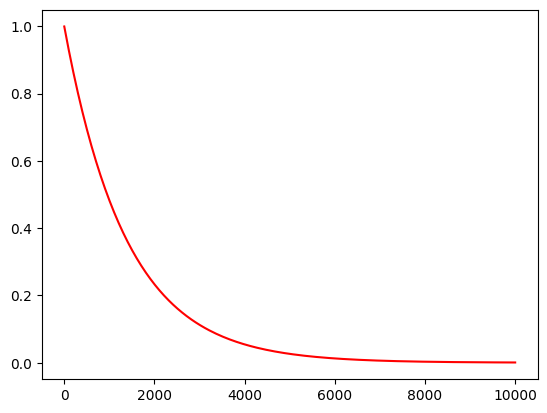

In [44]:
# Definir nuestras funciones de accesibilidad (caminata y vehiculos)

## Vehiculos (Exp Negativa)
power = -0.00072779540527115486884128506462084  #ln0,5/952,39290539585 #ln0,5/46,52
f_acc_veh = lambda d: e(1)**(power*d)

def plot(f, start = 1, end = 10000, n = 200): #minutos
    xs = np.linspace(start, end, n)
    fig = plt.figure()
    plt.plot(xs, [f(x) for x in xs], 'r')
    plt.show()

## Bicicletas (Exp Negativa)
#power = -0.09902102579427790134531887449403 #ln0,25/14
#f_acc_bici = lambda d: e(1)**(power*d)

plot(f_acc_veh)
#plot(f_acc_bici)

In [45]:
## Funciones de distancia y tiempo
def distancia(celdas_rm, id_origen, id_destino):
    ori = celdas_rm.loc[celdas_rm['cell'] == id_origen]['centroid'].iloc[0]
    des = celdas_rm.loc[celdas_rm['cell'] == id_destino]['centroid'].iloc[0]
    d = ori.distance(des)
    return d

def tiempo(celdas_rm, modo, id_origen, id_destino):
    dist_m = distancia(celdas_rm, id_origen, id_destino)
    if modo == 'veh':
        v = 25 # km/h
    elif modo == 'bici':
        v = 14 #km/h
    t = ((dist_m/1000)/v)*60
    return t

In [46]:
def acc_metro(celdas_rm, modo, celda):
    if modo == 'veh':
        celdas_rm['aux'] = celdas_rm.apply(lambda row: row['m2_manz']*f_acc_veh(distancia(celdas_rm, celda, row['cell'])), axis = 1)
    elif modo == 'bici':
        celdas_rm['aux'] = celdas_rm.apply(lambda row: row['m2_manz']*f_acc_bici(distancia(celdas_rm, celda, row['cell'])), axis = 1)
    acc_total = celdas_rm['aux'].sum()
    return acc_total

In [47]:
%%time
celdas_rm['acc_metro'] = celdas_rm.apply(lambda row: acc_metro(celdas_rm, 'veh', row['cell']), axis = 1)

CPU times: user 1h 3min 14s, sys: 28 s, total: 1h 3min 42s
Wall time: 2h 29min 24s


In [51]:
display(celdas_rm)

,cell,area,COMUNA,MANZ_SII,NOM_COMUNA,CMN_MZ,AREA_1,layer,path,m2_manz,Estacion,acc_metro,lat,lon,aux,geometry
0,8,58456.714755,15103,888,PROVIDENCIA,15103-888,208524.86926,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,12404.0,SALVADOR,9.109931e+06,348119.398092,6.300309e+06,450.028908,POINT (348119.398 6300309.088)
1,9,58456.714755,15103,888,PROVIDENCIA,15103-888,208524.86926,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,12404.0,BAQUEDANO,9.325714e+06,348047.903091,6.300011e+06,441.427177,POINT (348047.903 6300010.850)
2,10,58456.714755,15103,888,PROVIDENCIA,15103-888,208524.86926,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,12404.0,BAQUEDANO,9.453876e+06,348029.355562,6.299855e+06,440.410850,POINT (348029.356 6299854.887)
3,27,58456.714755,15103,888,PROVIDENCIA,15103-888,208524.86926,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,12404.0,SALVADOR,9.413509e+06,348220.276647,6.300395e+06,477.875456,POINT (348220.277 6300394.845)
4,28,58456.714755,15103,888,PROVIDENCIA,15103-888,208524.86926,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,12404.0,SALVADOR,9.849931e+06,348204.614800,6.300176e+06,486.249468,POINT (348204.615 6300176.390)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813,411,58456.714755,15103,13048,PROVIDENCIA,15103-13048,12164.47900,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,32240.0,BILBAO,7.944656e+06,352779.730361,6.299464e+06,32240.000000,POINT (352779.730 6299463.985)
1814,429,58456.714755,15103,13048,PROVIDENCIA,15103-13048,12164.47900,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,32240.0,BILBAO,6.874520e+06,352826.470164,6.299485e+06,27357.387135,POINT (352826.470 6299484.957)
1815,411,58456.714755,15103,12748,PROVIDENCIA,15103-12748,11801.09546,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,5803.0,BILBAO,7.944656e+06,352665.124402,6.299311e+06,5803.000000,POINT (352665.124 6299310.606)
1816,412,58456.714755,15103,12748,PROVIDENCIA,15103-12748,11801.09546,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/Investigación 1/I...,5803.0,BILBAO,7.535454e+06,352694.478699,6.299250e+06,4399.310808,POINT (352694.479 6299249.971)


In [52]:
celdas_rm = celdas_rm.drop(["centroid"], axis = 1)

KeyError: "['centroid'] not found in axis"

In [53]:
celdas_rm.to_file("acc_metronew.shp")